In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from matplotlib import rcParams

In [ ]:
import scipy as sp
sns.set_style('white')

In [ ]:
rcParams['figure.figsize'] = 16,4

In [ ]:
# read emodat.npy
data = np.load('emodat.npy')
# data.head()

Text(0.5, 1.0, 'First 60 seconds of ecog data')

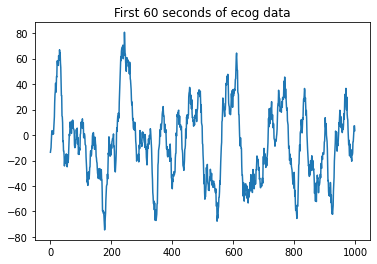

In [ ]:
%matplotlib inline
plt.plot(data[0:1000 ])
plt.title('First 60 seconds of ecog data')

In [ ]:
volt = np.load('sample_data_2.npy')

In [ ]:
# Sample and alias this data
# generate the time axis, make it 1000 as rate
rate = 1000
time = np.arange(0, len(volt)/rate, 1/rate)


In [ ]:
timeplot = [9, 10.5]
timeplotidx = np.where(np.logical_and(time>=timeplot[0], time < timeplot[1]))[0]

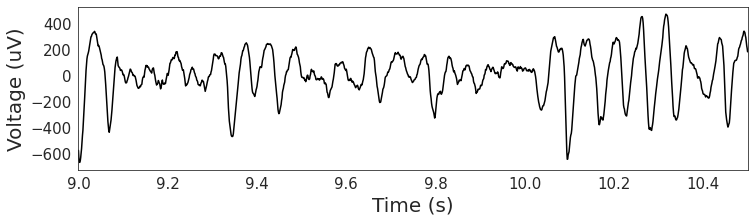

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(time[timeplotidx], volt[timeplotidx],'k')
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Time (s)',size=20)
plt.ylabel('Voltage (uV)',size=20)
plt.xlim((timeplot))
plt.show()

In [ ]:
import os
import scipy.io
import scipy.signal

In [ ]:
## power spectral density
# analyse data in freq domain
# psd
# power vs frequency (in X axis) is spectrum
# fourier transform
srate = 1017.2533
newsrate = 1024
ecog_signal = sp.signal.resample(data, int(np.floor(len(data)*(newsrate/srate))))

In [ ]:
srate = newsrate

In [ ]:
srate

1024

Text(0.5, 1.0, 'ECoG Signal in the Time Domain')

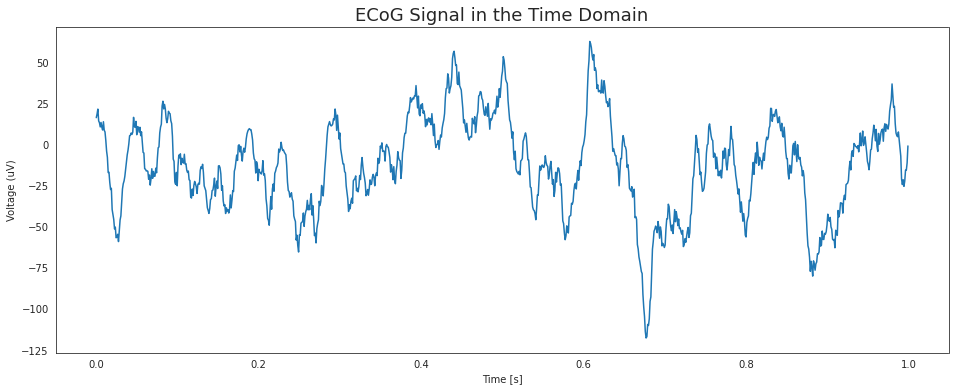

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(np.arange(0, 1024)/1024., data[10000:11024])
plt.ylabel('Voltage (uV)')
plt.xlabel('Time [s]')
plt.title('ECoG Signal in the Time Domain', size=18)

In [ ]:
# calculating fourier transform of complex signal
# we're going to take a sample of the data to keep fx bins at a reasonable size.
fourier = np.fft.fft(data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = srate/len(data[0:10000])
nyq = srate/2
total_steps = nyq/fx_step_size
#fx_bins = np.linspace(0,nyq,total_steps)



In [ ]:
total_steps

5000.0

In [ ]:
nyq

512.0

In [ ]:
fx_step_size

0.1024

In [ ]:
fx_bins = np.linspace(0,int(nyq),int(total_steps))

Text(0.5, 1.0, 'FFT of ECoG signal')

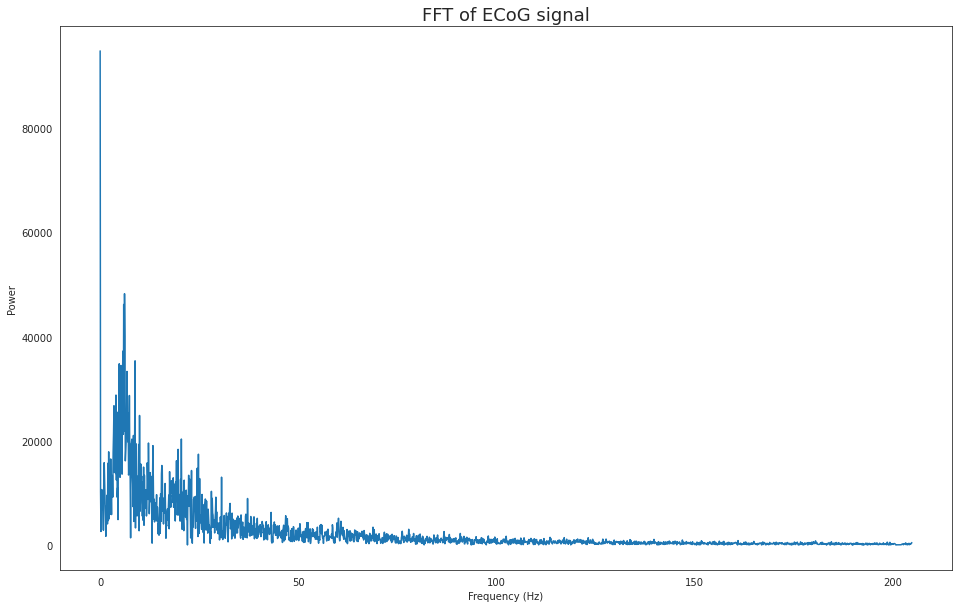

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(fx_bins[0:2000],abs(fourier[0:2000])) #any frequencies above 200 Hz are probably noise
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of ECoG signal', size=18)

Text(0.5, 1.0, 'FFT of ECoG signal (log scale)')

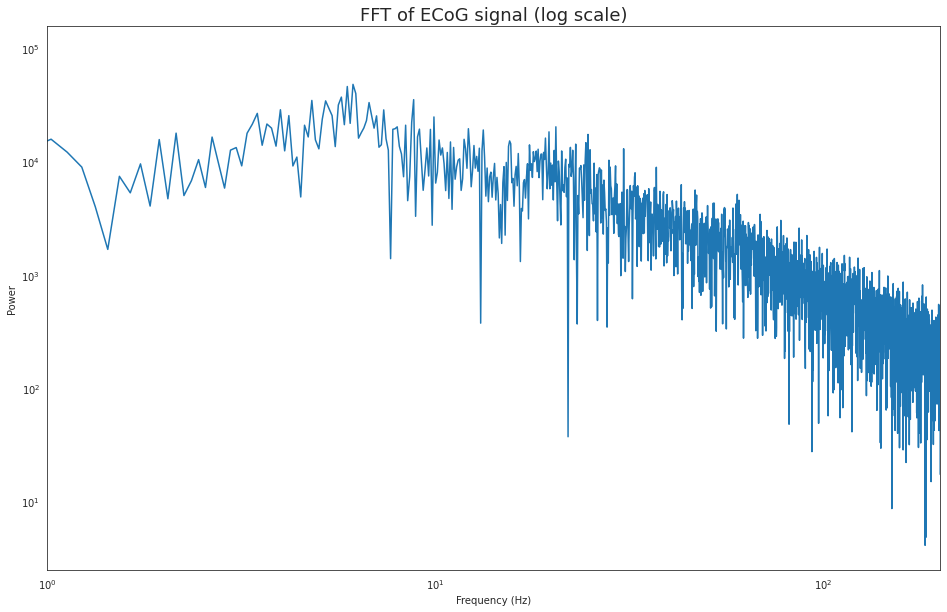

In [ ]:
# plot on a log log scale
plt.figure(figsize=(16,10))
plt.loglog((fx_bins[0:2000]),(abs(fourier[0:2000]))) #any frequencies above 200 Hz are probably noise
plt.xlim([1,200])
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of ECoG signal (log scale)', size=18)

Text(0.5, 1.0, "Welch's PSD of ECoG signal")

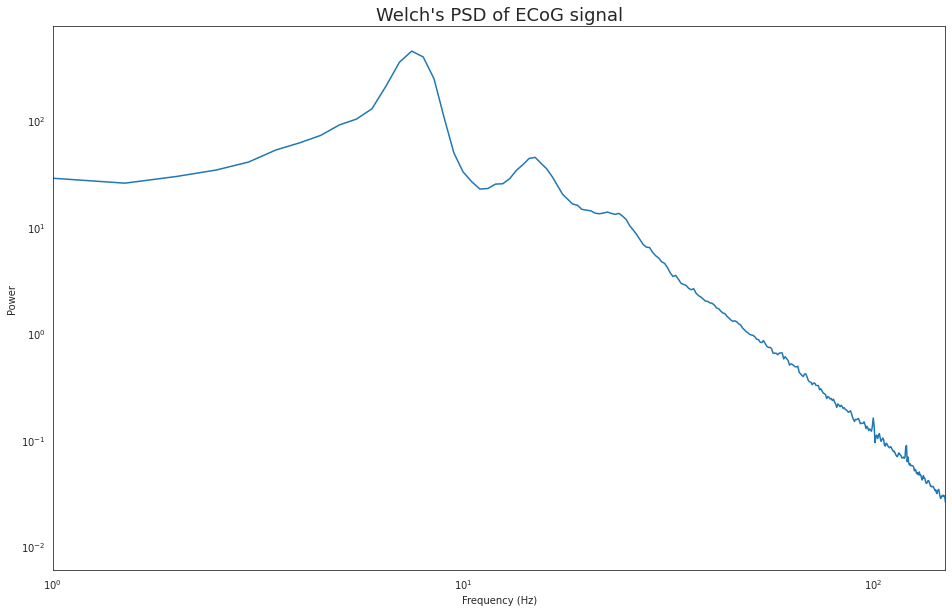

In [ ]:
#Calculate the Welch's PSD of the data
f,pspec = sp.signal.welch(data, fs=srate, window='hanning', nperseg=2*srate, noverlap=srate/2,
                          nfft=None, detrend='linear', return_onesided=True, scaling='density')

plt.figure(figsize=(16,10))
plt.loglog(f[0:200*2],pspec[0:200*2])#Any frequencies with >200 Hz are going to be noise in ECoG data.
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.xlim([1, 150])
plt.title("Welch's PSD of ECoG signal", size=18)

In [ ]:
# generate time axix
